# Exercise 03 Regression II

## Pedagogy

This notebook contains both theoretical explanations and executable cells to execute your code.

When you see the <span style="color:red">**[TBC]**</span> (To Be Completed) sign, it means that you need to perform an action else besides executing the cells of code that already exist. These actions can be:
- Complete the code with proper comments
- Respond to a question
- Write an analysis
- etc.

## Part 1. Multiple linear regression

This part will build a multiple linear regression model using the [Diabetes Dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

All availble features will be used as independent variables in the multiple linear regression model.

### Import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Data preparation

In [2]:
# load datasets
feature_df, target_df = datasets.load_diabetes(
    return_X_y = True, # return features and target separately
    as_frame = True, # return features and target as pandas DataFrame or Series
    scaled = False # return raw values
)

In [4]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values, # features
    target_df.values, # target
    train_size = 0.5, # 50% training & 50% testing
    shuffle = False # split dataset without shuffling
)

In [5]:
# obtain basic information
print("The number of features:", len(feature_df.columns))
print("Size of training dataset:", len(X_train))
print("Size of testing dataset:", len(X_test))

The number of features: 10
Size of training dataset: 221
Size of testing dataset: 221


### Training

In [6]:
# obtain the shape of X_train to see if it's a 2D array
X_train.shape

(221, 10)

In [7]:
# fit the multiple linear regression model
mlr = LinearRegression(fit_intercept = True)
mlr.fit(X_train, y_train)

LinearRegression()

In [8]:
# print the learned parameter values
parameter = pd.Series(
    data = mlr.coef_,
    index = feature_df.columns + '_coef'
)
parameter['intercept'] = mlr.intercept_
print(parameter)

age_coef      -0.103646
sex_coef     -27.311730
bmi_coef       5.513811
bp_coef        0.865715
s1_coef       -1.141010
s2_coef        0.604114
s3_coef        0.768768
s4_coef       10.839593
s5_coef       68.946417
s6_coef        0.568497
intercept   -339.871607
dtype: float64


In [9]:
# model performance on the training dataset
rmse_train = mean_squared_error(y_train, mlr.predict(X_train), squared = False)
r2_train = r2_score(y_train, mlr.predict(X_train))

print("RMSE train:", rmse_train)
print("R2 train:", r2_train)

RMSE train: 53.5092675512025
R2 train: 0.4914462740197182


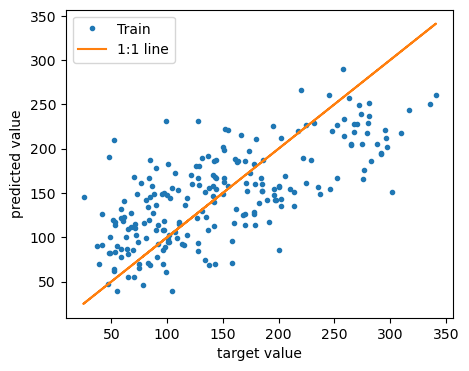

In [10]:
# visualization
plt.figure(figsize = [5, 4])
plt.plot(y_train, mlr.predict(X_train), '.', label = 'Train')
plt.plot(y_train, y_train, '-', label = '1:1 line')
plt.legend()
plt.xlabel('target value')
plt.ylabel('predicted value')
plt.show()

### Evaluation

In [11]:
# make predictions on testing dataset
y_pred = mlr.predict(X_test)

In [12]:
# model performance on the testing dataset
rmse_test = mean_squared_error(y_test, y_pred, squared = False)
r2_test = r2_score(y_test, y_pred)

print("RMSE test:", rmse_test)
print("R2 test:", r2_test)

RMSE test: 54.26162382705954
R2 test: 0.5248892716360294


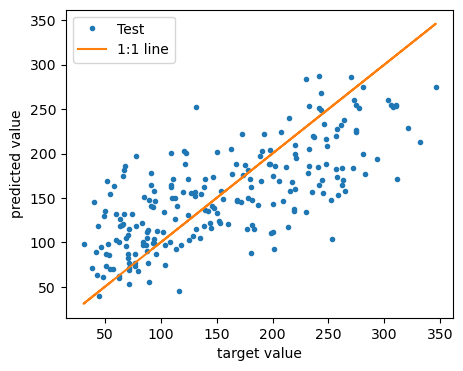

In [13]:
# visualization
plt.figure(figsize = [5, 4])
plt.plot(y_test, y_pred, '.', label = 'Test')
plt.plot(y_test, y_test, '-', label = '1:1 line')
plt.legend()
plt.xlabel('target value')
plt.ylabel('predicted value')
plt.show()

## Part 2. Feature selection

Insteading of using all available features, we can perform feature selection before model training.

In this part, We will use the filter method to select 9 features among the 10 available features.
- Use `sklearn.feature_selection.SelectKBest` to implement the filter method
- Use `sklearn.feature_selection.r_regression` as the score function

### Import libraries

In [14]:
# import libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression

### Data preparation

In [15]:
# load datasets
feature_df, target_df = datasets.load_diabetes(
    return_X_y = True, # return features and target separately
    as_frame = True, # return features and target as pandas DataFrame or Series
    scaled = False # return raw values
)

In [16]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values, # features
    target_df.values, # target
    train_size = 0.5, # 50% training & 50% testing
    shuffle = False # split dataset without shuffling
)

### Feature selection

In [17]:
# Use r_regression
selector_r = SelectKBest(
    score_func = r_regression, # specify Pearson correlation coefficient as the score function
    k = 9 # select the 9 best features
)
selector_r.fit(X_train, y_train) # use the training dataset instead of the entire dataset

SelectKBest(k=9, score_func=<function r_regression at 0x0000021F1C0031C0>)

In [18]:
# formalize the selection result as a DataFrame
result_r = pd.DataFrame(
    {
        'feature': feature_df.columns.values, # feature names
        'score': selector_r.scores_, # scores for each feature
        'selected': selector_r.get_support() # selected or not
    }
)
result_r

,feature,score,selected
0,age,0.148060,True
1,sex,0.030765,True
2,bmi,0.551716,True
3,bp,0.399320,True
4,s1,0.158296,True
5,s2,0.123103,True
6,s3,-0.370010,False
7,s4,0.391922,True
8,s5,0.561528,True
9,s6,0.399089,True


From the above results we can find that 's3' was not selected. This is because it has the lowest score (-0.37).

However, the scores here represent the Pearson correlation coefficient.

According to the definition of Pearson correlation coefficient, the closer the absolute value is to 1, the stronger the correlation.

Therefore, 's3' is not the worst feature among others. There is a negative, or inverse correlation between 's3' and the target variable. We can check this by creating a scatter plot.

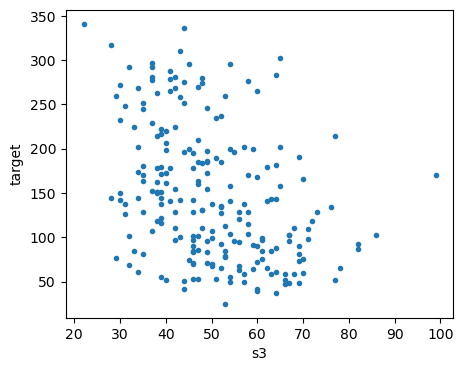

In [19]:
# scatter plot between s3 and target
plt.figure(figsize = [5, 4])
plt.plot(X_train[:,6], y_train, '.')
plt.xlabel('s3')
plt.ylabel('target')
plt.show()

From the above feature we can see, there is a negative correlation between 's3' and the target variable, although the correlation is not very strong.

When using `sklearn.feature_selection.SelectKBest`, the selector will select features according to the highest scores, not the highest absolute value of scores.

Therefore, when specfying `r_regression` as the score funtion for `SelectKBest`, the selector will rank features with negative correlation coefficients lower, which is not correct.

When there are negative correlations between features and target in the dataset, avoid using `r_regression` and `SelectKBest` at the same time. Use `f_regression` or `mutual_info_regression` as the socre function instead.

## Part 3. Polynomial Regression

In this part, we will build a polynomial regression model with a single input feature (the 'bmi').

We will see how to
- use `sklearn.preprocessing.PolynomialFeatures` to generate polynomial terms as the new features
- use `sklearn.linear_model.LinearRegression` to implement polynomial regression
- use `sklearn.pipeline.Pipeline` to construct a pipeline that embeds the above two steps

### Import libraries

In [20]:
# import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

### Data preparation

In [22]:
# load datasets
feature_df, target_df = datasets.load_diabetes(
    return_X_y = True, # return features and target separately
    as_frame = True, # return features and target as pandas DataFrame or Series
    scaled = False # return raw values
)

In [23]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_df['bmi'].values, # feature bmi
    target_df.values, # target
    train_size = 0.5, # 50% training & 50% testing
    shuffle = False # split dataset without shuffling
)

### Pipeline construction

`sklearn.pipeline.Pipeline` is used to define a pipeline that embeds a sequence of operations of data.

Data going through a pipeline means that data will finish each operation step by step.

Here we have two steps: (1) generate polynomial features, (2) multiple linear regression.

Therefore, we can define a pipeline to embed these steps, which will act as a polynomial regression model.

In [24]:
# define the pipeline
pipeline = Pipeline(
    [
        ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
        ('mlr', LinearRegression(fit_intercept = True))
    ]
)

`sklearn.preprocessing.PolynomialFeatures` acts as a transformer.

Given a single feature as input, `sklearn.preprocessing.PolynomialFeatures` will generate a new feature matrix consisting of all polynomial combinations of the input feature with degree less than or equal to the specified degree.

If `include_bias = True`, the return of `sklearn.preprocessing.PolynomialFeatures` will include a bias column, the feature in which the polynomial power is zero (i.e. a column of ones - acts as an intercept term in a linear model).

Therefore, if we set `include_bias = True` for the `sklearn.preprocessing.PolynomialFeatures`,  we should also set `fit_intercetp = False` for the `LinearRegression`.

### Training

In [25]:
# fit the polynomial regression model
pipeline.fit(X_train.reshape(-1, 1), y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('mlr', LinearRegression())])

In [26]:
# model performance on the training dataset
rmse_train = mean_squared_error(y_train, pipeline.predict(X_train.reshape(-1, 1)), squared = False)
r2_train = r2_score(y_train, pipeline.predict(X_train.reshape(-1, 1)))

print("RMSE train:", rmse_train)
print("R2 train:", r2_train)

RMSE train: 62.33004237948045
R2 train: 0.3099609439987683


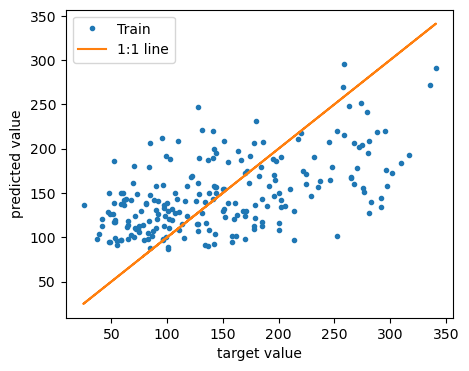

In [27]:
# visualization
plt.figure(figsize = [5, 4])
plt.plot(y_train, pipeline.predict(X_train.reshape(-1, 1)), '.', label = 'Train')
plt.plot(y_train, y_train, '-', label = '1:1 line')
plt.legend()
plt.xlabel('target value')
plt.ylabel('predicted value')
plt.show()

### Evaluation

In [28]:
# make predictions on testing dataset
y_pred = pipeline.predict(X_test.reshape(-1, 1))

In [29]:
# model performance on the training dataset
rmse_test = mean_squared_error(y_test, y_pred, squared = False)
r2_test = r2_score(y_test, y_pred)

print("RMSE test:", rmse_test)
print("R2 test:", r2_test)

RMSE test: 62.991959160655014
R2 test: 0.3597059052585815


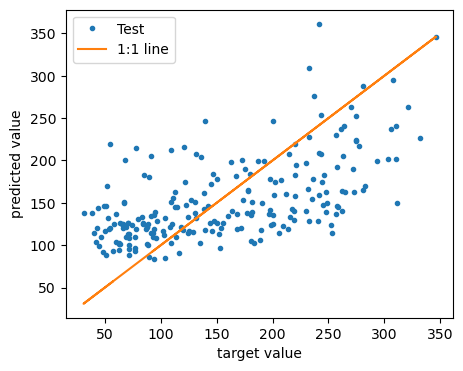

In [30]:
# visualization
plt.figure(figsize = [5, 4])
plt.plot(y_test, y_pred, '.', label = 'Test')
plt.plot(y_test, y_test, '-', label = '1:1 line')
plt.legend()
plt.xlabel('target value')
plt.ylabel('predicted value')
plt.show()

## Part 4. Hands-on exercise

In this exercise, we will build a polynomial regression model with the [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset), the same one as Exercise 02.

You can find the description of this dataset [here](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).

The goal of the regression model is to predict the median house value (MedHouseVal) for California districts, , expressed in hundreds of thousands of dollars ($100,000).

<span style="color:red">**[TBC]**</span> Please complete the following tasks:
- Load the California Housing Dataset
- Split the dataset into the training and testing part
- Construct a pipeline as the polynomial regression model with all features
- Train and evaluate the model

### Task 1. Load the California Housing Dataset

<span style="color:red">**[TBC]**</span> It can be downloaded/loaded using the `sklearn.datasets.fetch_california_housing()` function.

In [64]:
# [TBC] complete your code here with proper comments
# load diabetes dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing 
import numpy as np
import matplotlib.pyplot as plt

# Fetch the California housing dataset
data_California = fetch_california_housing(as_frame=True)

# load datasets
feature_df, target_df = data_California.data, data_California.target
"""
feature_df, target_df = data_California.data(
    return_X_y = True, # return features and target separately
    as_frame = True, # return features and target as pandas DataFrame or Series
    scaled = False # return raw values
)"""


'\nfeature_df, target_df = data_California.data(\n    return_X_y = True, # return features and target separately\n    as_frame = True, # return features and target as pandas DataFrame or Series\n    scaled = False # return raw values\n)'

### Task 2. Split the dataset into the training and testing part
<span style="color:red">**[TBC]**</span> Please split the whold dataset into two parts: the training and testing set. Please use 70% of the data as the training dataset, and the rest as the testing dataset.

In [67]:
# [TBC] complete your code here with proper comments
# Split the dataset into the training and testing part

# Assuming feature_df is your features and target_df is your target variable
X_train, X_test, y_train, y_test = train_test_split(feature_df, target_df, test_size=0.3, random_state=42)
# test_size=0.3 specifies that 30% of the data will be used for testing, and the remaining 70% for training.

"""
X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values, # features
    target_df.values, # target
    train_size = 0.7, # 70% training & 30% testing
    shuffle = False # split dataset without shuffling
)
"""
print(f"Training x shape: {X_train.shape}")
print(f"Training y shape: {y_train.shape}")
print(f"Testing x shape: {X_test.shape}")
print(f"Testing y shape: {y_test.shape}")
print("The number of features:", len(feature_df.columns))
print("Size of training dataset:", len(X_train))
print("Size of testing dataset:", len(X_test))


Training x shape: (14448, 8)
Training y shape: (14448,)
Testing x shape: (6192, 8)
Testing y shape: (6192,)
The number of features: 8
Size of training dataset: 14448
Size of testing dataset: 6192


### Task 3. Construct a pipeline

<span style="color:red">**[TBC]**</span> Please construct a pipeline as the polynomial regression model (degree = 2). All available features in the dataset will be used as the input variables. There are two steps in this pipeline: `PolynomialFeatures` and `LinearRegression`.

In [68]:
# [TBC] complete your code here with proper comments
# Construct a pipeline as the polynomial regression model with all features
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)), # Polynomial feature transformation without bias
    ("linear_regression", LinearRegression(fit_intercept=True)) # Linear regression with intercept fitting
])

# Fitting the model
polynomial_regression.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('linear_regression', LinearRegression())])

<span style="color:red">**[TBC]**</span> Please explain the meaninng of the parameter `include_bias` of `PolynomialFeatures` and the relationship between this parameter and the parameter `fit_intercept` of `LinearRegression`.

<span style="color:red">**[TBC]**</span> Write your answer here.

The include_bias parameter in PolynomialFeatures determines whether or not to include a bias (also known as the intercept)

As described before: 

- When include_bias=True, an additional column consisting of all ones is added to the features. This column represents the zero-degree polynomial, essentially an intercept term.
- When include_bias=False, this column is not included.

The relationship between these two parameters is about ensuring that the model setup is consistent and avoiding unnecessary redundancy. If you include a bias column using 

- PolynomialFeatures(include_bias=True), you typically should set LinearRegression(fit_intercept=False) to prevent the linear model from fitting another intercept term. 
- If you use PolynomialFeatures(include_bias=False), you should generally allow LinearRegression to fit the intercept (i.e., fit_intercept=True).

These parameters control how the intercept term is handled in polynomial feature transformation and linear regression modeling, and they should be set in a complementary manner to ensure the effectiveness and correctness of the model.

### Task 4. Train and evaluate the model

<span style="color:red">**[TBC]**</span>

Please fit the model to the training dataset, then evaluate the model with the testing dataset.

Please calculate the RMSE and R2 of model on both training and testing dataset.

Please visulaize the model's predictions on training and testing dataset.

Training RMSE: 0.6508463314463676
Testing RMSE: 0.6745163720001559
Training R^2 Score: 0.6838081517893683
Testing R^2 Score: 0.6533650031814691


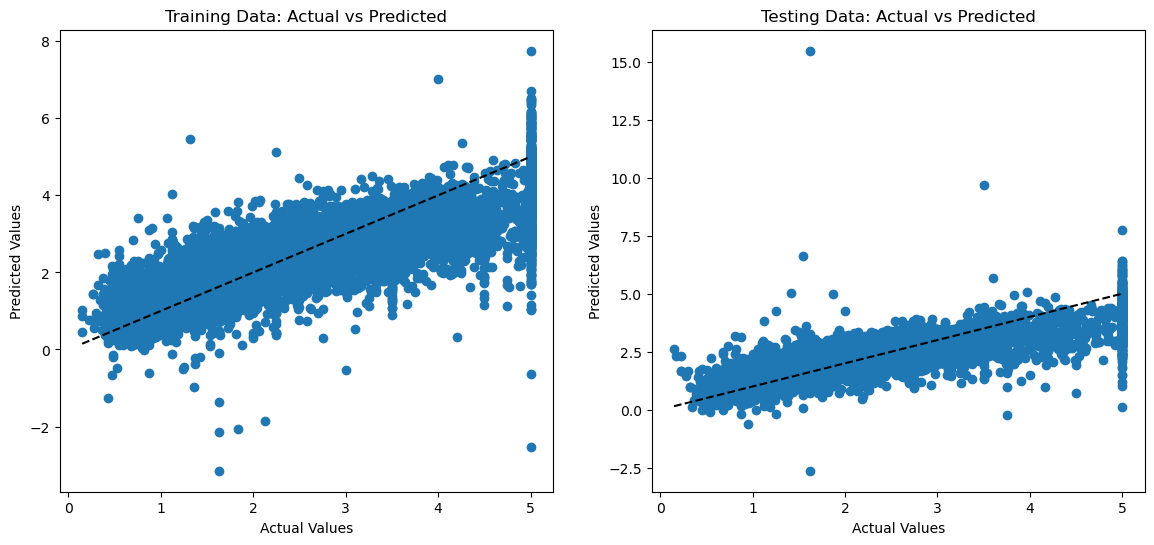

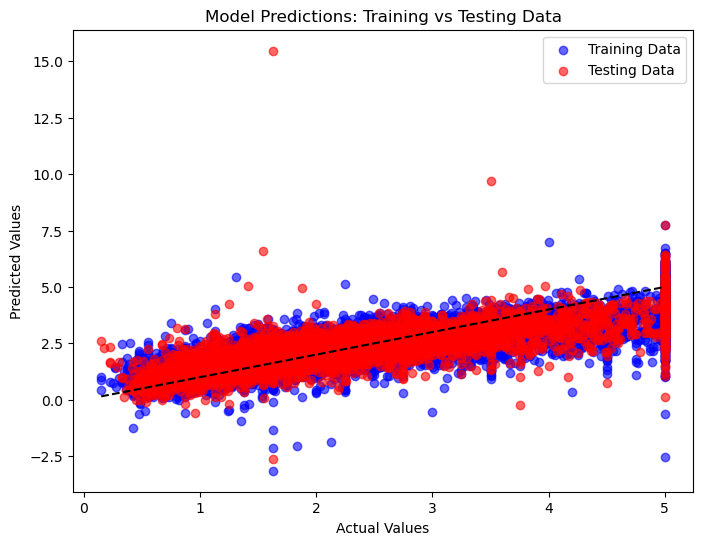

In [73]:
# [TBC] complete your code here with proper comments
# Train and evaluate the model
# Making predictions on the training and testing datasets
y_train_pred = polynomial_regression.predict(X_train)
y_test_pred = polynomial_regression.predict(X_test)

# Calculating RMSE for training and testing datasets
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculating R^2 for training and testing datasets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Displaying the results
print("Training RMSE:", rmse_train)
print("Testing RMSE:", rmse_test)
print("Training R^2 Score:", r2_train)
print("Testing R^2 Score:", r2_test)

# Scatter plot for training data
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred)
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')  # Reference line

# Scatter plot for testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred)
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Reference line

# Combined scatter plot for training and testing data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6, label='Training Data', color='blue')
plt.scatter(y_test, y_test_pred, alpha=0.6, label='Testing Data', color='red')
plt.title('Model Predictions: Training vs Testing Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_train.min(), y_test.max()], [y_train.min(), y_test.max()], 'k--')  # Reference line
plt.legend()
plt.show()

plt.show()

### Challenge 1. Under-fitting & Over-fitting

Increasing the degree of polynomial will increase the complexity of polynomial regression model.

A polynomial regression model with higher degree will tend to over-fit the training dataset.

Please try to build polynomial regression models with different degrees (1, 2, 3, 4, 5, 6).

Please create a figure of line graph. The x-axis is the degree of the polynomial regression model. The y-axis is the RMSE of model on training / testing dataset.

Use this figure to analyze when model under-fits or over-fits the training dataset.

<span style="color:red">**[TBC]**</span> This challenge won't be evaluated and counted towards your grade. You may submit this assignment without solving this challenge. However, leaving this part blank is not allowed. Try to complete the code even if it doesn't meet the requirements.

In [77]:
# [TBC] complete your code here with proper comments

# Dictionary to store models
polynomial_models = {}


# (THIS CODE TAKE SOME SECOND TO WORK, BECAUSE OF THE LOOP "FOR")
# Loop over degrees
for degree in [1, 2, 3, 4, 5, 6]:
    # Create a polynomial regression model for the current degree
    poly_reg_model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("linear_regression", LinearRegression(fit_intercept=True))
    ])
    # Fit the model
    poly_reg_model.fit(X_train, y_train)
    # Store the model in the dictionary
    polynomial_models[degree] = poly_reg_model
    # Optional: Evaluate the model and print performance metrics
    y_train_pred = poly_reg_model.predict(X_train)
    y_test_pred = poly_reg_model.predict(X_test)

    # Optional: Evaluate the model and print performance metrics
    y_train_pred = poly_reg_model.predict(X_train)
    y_test_pred = poly_reg_model.predict(X_test)
    print(f"Degree {degree}:")
    print("  Training RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print("  Testing RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
    print("  Training R^2 Score:", r2_score(y_train, y_train_pred))
    print("  Testing R^2 Score:", r2_score(y_test, y_test_pred))
    print()

Degree 1:
  Training RMSE: 0.7234346057708156
  Testing RMSE: 0.7284008391515454
  Training R^2 Score: 0.609345972797216
  Testing R^2 Score: 0.5957702326061662

Degree 2:
  Training RMSE: 0.6508463314463676
  Testing RMSE: 0.6745163720001559
  Training R^2 Score: 0.6838081517893683
  Testing R^2 Score: 0.6533650031814691

Degree 3:
  Training RMSE: 0.5865008544748772
  Testing RMSE: 3.923458916103782
  Training R^2 Score: 0.7432378255334642
  Testing R^2 Score: -10.728045318168125

Degree 4:
  Training RMSE: 0.5778378676045316
  Testing RMSE: 33.26098488991979
  Training R^2 Score: 0.7507668852840526
  Testing R^2 Score: -841.8642364994766

Degree 5:
  Training RMSE: 0.583414870446291
  Testing RMSE: 120.43905003966367
  Training R^2 Score: 0.7459327214670264
  Testing R^2 Score: -11050.521159697546

Degree 6:
  Training RMSE: 1.2640953857233888
  Testing RMSE: 95.78147613490191
  Training R^2 Score: -0.19276102270797235
  Testing R^2 Score: -6988.570159391884



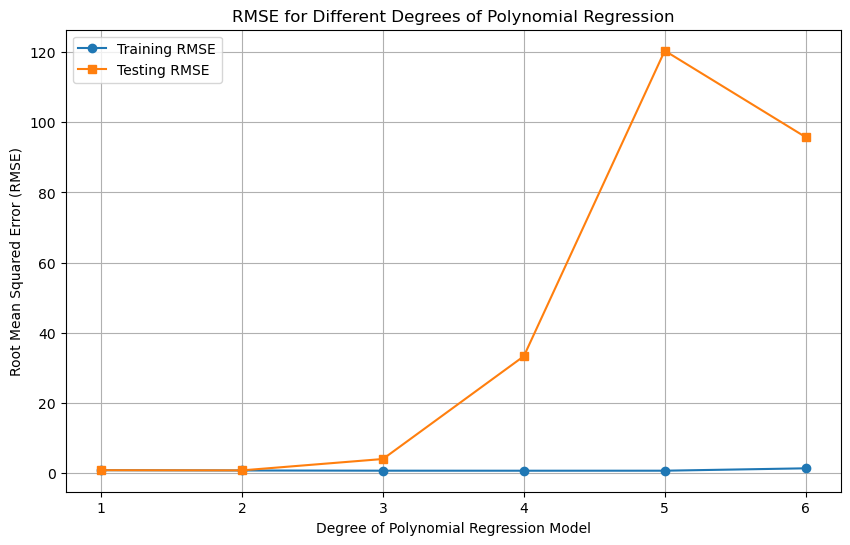

In [79]:
# Arrays to store RMSE values for each degree
train_rmse = []
test_rmse = []

# Calculate RMSE for models of degree 1 to 6
for degree in range(1, 7):
    model = polynomial_models[degree]
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Creating the line graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 7), train_rmse, label='Training RMSE', marker='o')
plt.plot(range(1, 7), test_rmse, label='Testing RMSE', marker='s')
plt.xlabel('Degree of Polynomial Regression Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE for Different Degrees of Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

This visualization will give you a clear picture of how the model performs on both datasets and whether it's overfitting or underfitting. If both sets of points roughly follow the same pattern and are close to the dashed line, your model is generalizing well. Discrepancies between the two sets might indicate overfitting or underfitting.

### Challenge 2. Embed feature selection into pipeline

We have 8 features in the original California Housing dataset

If the degree was set to 6, there will be 3002 terms in the polynomial, which means there are 3002 features in the resulting regression model.

To reduce the complexity of the resulting model, please embed feature selection into the pipeline (between `PolynomialFeatures` and `LinearRegression`) to force there will be only 8 features selected in the final model. Use `sklearn.feature_selection.f_regression` as the score function of `SelectKBest`.

Please try to build polynomial regression models with different degrees (1, 2, 3, 4, 5, 6) using this new pipeline to see if the over-fitting is restrained.

<span style="color:red">**[TBC]**</span> This challenge won't be evaluated and counted towards your grade. You may submit this assignment without solving this challenge. However, leaving this part blank is not allowed. Try to complete the code even if it doesn't meet the requirements.

In [90]:
# [TBC] complete your code here with proper comments
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures

# Dictionary to store models
polynomial_models_with_selection = {}

# Loop over degrees
for degree in [1, 2, 3, 4, 5, 6]:
    # Create a polynomial regression model for the current degree with feature selection
    poly_reg_model_with_selection = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("feature_selection", SelectKBest(f_regression, k=8)),  # Feature selection
        ("linear_regression", LinearRegression(fit_intercept=True))
    ])

    # Fit the model
    poly_reg_model_with_selection.fit(X_train, y_train)
    
    # Store the model in the dictionary
    polynomial_models_with_selection[degree] = poly_reg_model_with_selection

     # Optional: Evaluate the model and print performance metrics
    y_train_pred = poly_reg_model_with_selection.predict(X_train)
    y_test_pred = poly_reg_model_with_selection.predict(X_test)
    print(f"Degree {degree}:")
    print("  Training RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print("  Testing RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
    print("  Training R^2 Score:", r2_score(y_train, y_train_pred))
    print("  Testing R^2 Score:", r2_score(y_test, y_test_pred))
    print()

Degree 1:
  Training RMSE: 0.7234346057708156
  Testing RMSE: 0.7284008391515452
  Training R^2 Score: 0.6093459727972159
  Testing R^2 Score: 0.5957702326061664

Degree 2:
  Training RMSE: 0.7208552578194137
  Testing RMSE: 0.727812075562215
  Training R^2 Score: 0.6121266978001467
  Testing R^2 Score: 0.5964234432298965

Degree 3:
  Training RMSE: 0.7326095988957879
  Testing RMSE: 0.722691766268741
  Training R^2 Score: 0.599374161436939
  Testing R^2 Score: 0.6020819585448434

Degree 4:
  Training RMSE: 0.7358140811553346
  Testing RMSE: 0.7249025118322358
  Training R^2 Score: 0.595861769288758
  Testing R^2 Score: 0.599643737717152

Degree 5:
  Training RMSE: 0.7419617267270263
  Testing RMSE: 0.731764676333931
  Training R^2 Score: 0.5890804979749299
  Testing R^2 Score: 0.5920280543487655

Degree 6:
  Training RMSE: 0.741951405530437
  Testing RMSE: 0.7317684264544329
  Training R^2 Score: 0.5890919302397252
  Testing R^2 Score: 0.5920238728190269



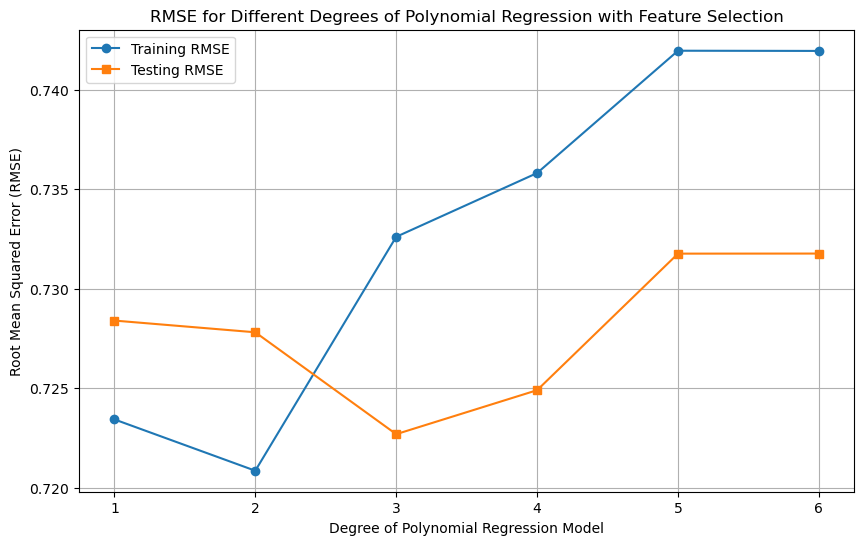

In [91]:
# Arrays to store RMSE values for each degree
train_rmse_with_selection = []
test_rmse_with_selection = []

# Calculate RMSE for models of degree 1 to 6 with feature selection
for degree in range(1, 7):
    model_with_selection = polynomial_models_with_selection[degree]
    y_train_pred = model_with_selection.predict(X_train)
    y_test_pred = model_with_selection.predict(X_test)
    train_rmse_with_selection.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse_with_selection.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Creating the line graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 7), train_rmse_with_selection, label='Training RMSE', marker='o')
plt.plot(range(1, 7), test_rmse_with_selection, label='Testing RMSE', marker='s')
plt.xlabel('Degree of Polynomial Regression Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE for Different Degrees of Polynomial Regression with Feature Selection')
plt.legend()
plt.grid(True)
plt.show()

